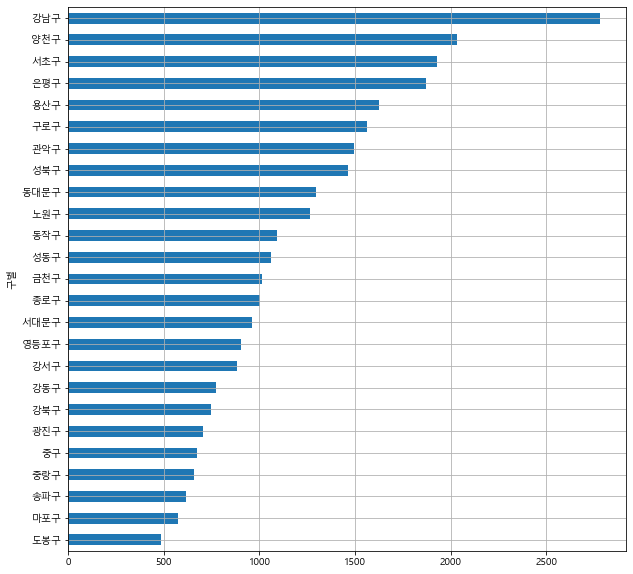

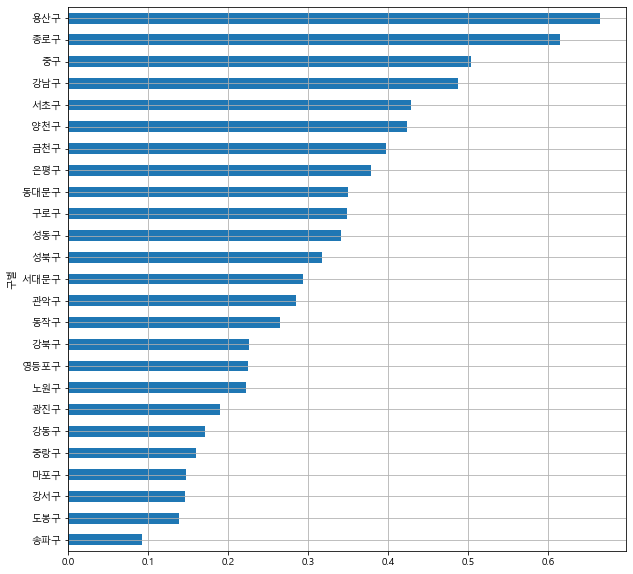

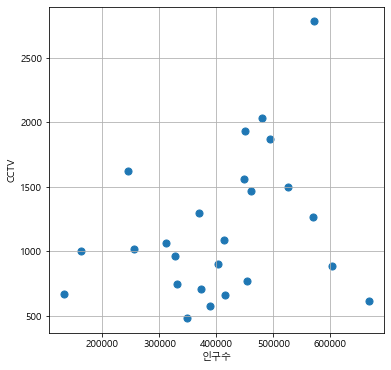

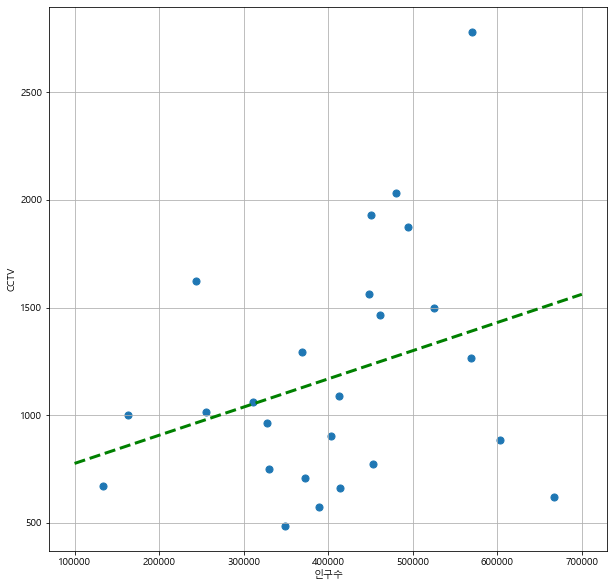

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
# 한글문제 해결처리 
################################################################
from matplotlib import font_manager, rc
import platform
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')
################################################################

CCTV_Seoul = pd.read_csv('/python_Pjt/DataScience-master/data/01. CCTV_in_Seoul.csv', encoding='utf-8')
CCTV_Seoul.head()
CCTV_Seoul.columns # [0] 숫자넣으면 해당 칼럼 이름 조회 가능 
CCTV_Seoul.loc[:,['기관명']]
df_cctv= CCTV_Seoul.rename(columns={'기관명':'구별'}) #교재에서는 그냥 replace로 바꿔버림
df_cctv
df_cctv= CCTV_Seoul.rename(columns={'기관명':'구별'}) 
df3 = pd.read_excel("DataScience-master/data/01. population_in_Seoul.xls", header=2) #헤더 줄 선택
df3 #인덱스는 하나 
df4 = df3.loc[:,['자치구','계','계.1', '계.2','65세이상고령자']]
df_populate = df4.rename(columns = {'자치구':'구별', '계':'인구수', '계.1':'한국인', '계.2':'외국인','65세이상고령자':'고령자'})
data_result=pd.merge(df_cctv,df_populate,on='구별')
data_result.set_index('구별',inplace=True)
data_result

data_result.head()
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

data_result['CCTV비율'] =data_result['소계']/data_result['인구수']*100
data_result['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

fp1 =np.polyfit(data_result['인구수'], data_result['소계'],1) #넘파이의 폴리핏 : 직선만들기
fp1
f1 = np.poly1d(fp1)
fx = np.linspace(100000,700000, 100)
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

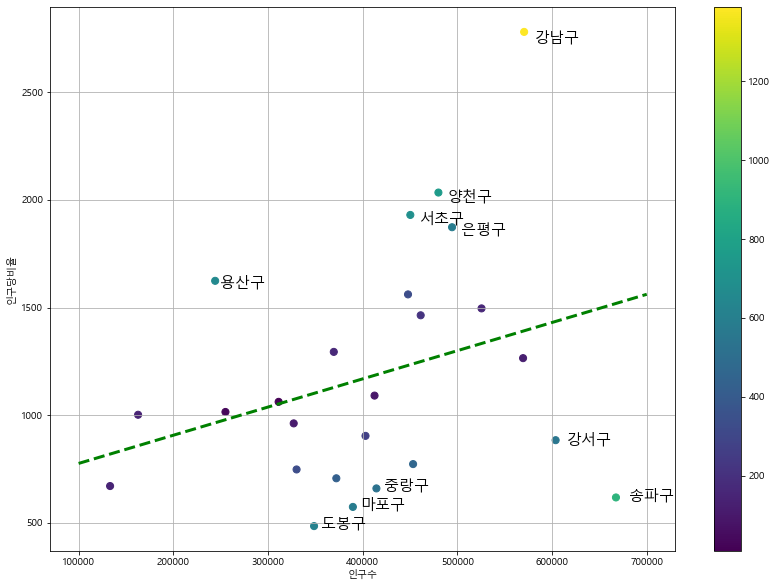

In [31]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'],1)
f1 = np.poly1d(fp1)
fx = np.linspace(100000,700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort= data_result.sort_values(by='오차', ascending=False)
df_sort.head()

plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'], c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, df_sort.index[n], fontsize=15)

plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()